In [2]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu

# Lade Modul neu, um Änderungen zu übernehmen
import importlib
if 'utils_functions' in sys.modules:
    importlib.reload(sys.modules['utils_functions'])

from utils_functions import to_float_array, df_d0, dataframe1, fit_exponential_decay, plot_data_with_fits, plot_parameter_histograms, fit_linear, plot_linear_fits, plot_slope_histogram,df_d0_absolut, dataframe1_absolut
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)
4. fit_linear(data_frames)
5. plot_linear_fits(results, title, save_path, uniform_axes)
6. plot_slope_histogram(results, save_path, figsize)


In [30]:
# Import Influx Data
I_data_path = "/workspaces/EWT/EWT8/data/EW8_Uptake 0.78 mM ilacco1.0^J1^J1^J1.2_mit_ohne_CCCP.csv"
datapath2 = "/workspaces/EWT/EWT8/data/EW8_Uptake 0.78 mM ilacco1.0 u.1.2_CCCP.csv"
datapath3 = "/workspaces/EWT/EWT8/data/EW8_Uptake 0.78 mM ilacco1.1_ohne_mitCCCP.csv"
df_I1_0_2 = pd.read_csv(I_data_path, skiprows=74, delimiter=';', encoding='UTF-8', decimal =',')
df_I1_0_2_CCCP = pd.read_csv(datapath2, skiprows=74, delimiter=';', encoding='UTF-8', decimal =',')
df_I1_1_w_wo_CCCP = pd.read_csv(datapath3, skiprows=74, delimiter=';', encoding='UTF-8', decimal =',')

df_I1_0_2= df_I1_0_2.drop(df_I1_0_2.index[1:32])
df_I1_0_2_CCCP = df_I1_0_2_CCCP.drop(df_I1_0_2_CCCP.index[list(range(1, 8)) + list(range(11, 20))])
df_I1_1_w_wo_CCCP = df_I1_1_w_wo_CCCP.drop(df_I1_1_w_wo_CCCP.index[list(range(1,56)) + list(range(59,68))])
#print(df_I1_0_2.head(10))
print(df_I1_0_2_CCCP.head(10))
#print(df_I1_1_w_wo_CCCP.head(10))




   Cycle Nr.      1          2          3      4          5          6  \
0   Time [s]      0      3.262      5.608  7,946     10.291     12.626   
8       i1.0   8436   8656.000   8734.000   8892   8930.000   9035.000   
9         A8   8770   9060.000   9100.000   9296   9509.000   9495.000   
10        A9   8424   8753.000   8806.000   9015   9064.000   9212.000   
20      i1.2   8856   9020.000   9288.000   9473   9618.000   9700.000   
21        B8  10036  10458.000  10731.000  11088  11181.000  11401.000   
22        B9   8953   9268.000   9428.000   9648   9704.000   9821.000   
23       B10    NaN        NaN        NaN    NaN        NaN        NaN   
24       B11    NaN        NaN        NaN    NaN        NaN        NaN   
25       B12    NaN        NaN        NaN    NaN        NaN        NaN   

            7         8          9  ...         70         71         72  \
0      14.968     17.32     19.664  ...    162.675    165.017    167.356   
8    9025.000   9196.00   9173.00

In [28]:
# Import Efflux Data
path1 = "/workspaces/EWT/EWT8/data/EWT8_Efflux_alle_ilaccos_mit_ohne_CCCP.csv"
path2 = "/workspaces/EWT/EWT8/data/EWT8_Efflux_Ilacco1.1_CCCP.csv"
path3 = "/workspaces/EWT/EWT8/data/EWT8_Efflux_Ilacco1.1.csv"
df_E_I1_0_2 = pd.read_csv(path1, skiprows=74, delimiter=';', encoding='UTF-8', decimal =',')
df_E_I1_1_CCCP = pd.read_csv(path2, skiprows=74, delimiter=';', encoding='UTF-8', decimal =',')
df_E_I1_1 = pd.read_csv(path3, skiprows=74, delimiter=';', encoding='UTF-8', decimal =',')


df_E_I1_0_2 = df_E_I1_0_2.drop(df_E_I1_0_2.index[1:29])
df_E_I1_1_CCCP = df_E_I1_1_CCCP.drop(df_E_I1_1_CCCP.index[1:92])
df_E_I1_1 = df_E_I1_1.drop(df_E_I1_1.index[1:80])
df_E_I1_0_2.head(10)

,Cycle Nr.,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,Time [s],0,2.515,5.034,"7,55",10.056,12.577,15.1,17.605,20.117,...,396.607,399.114,401.624,404.131,406.649,409.158,411.671,414.18,416.7,419.204
29,i1.0,11885,11794.000,11769.000,11770,11577.000,11660.000,11422.0,11462.000,11393.000,...,7435.000,7425.000,7406.000,7425.000,7433.000,7351.000,7290.000,7397.00,7366.0,7414.000
30,i1.0,12942,12965.000,12838.000,12677,12713.000,12560.000,12467.0,12442.000,12324.000,...,7478.000,7450.000,7466.000,7466.000,7439.000,7340.000,7450.000,7322.00,7276.0,7282.000
31,i1.0,12076,11968.000,11981.000,11931,11938.000,11813.000,11804.0,11624.000,11639.000,...,6929.000,6878.000,7019.000,7004.000,6896.000,6723.000,6871.000,6858.00,6809.0,6803.000
32,i1.0+CCCP,6371,6349.000,6294.000,6289,6154.000,6196.000,6051.0,6074.000,5994.000,...,3508.000,3493.000,3481.000,3515.000,3463.000,3483.000,3464.000,3482.00,3468.0,3495.000
33,i1.0+CCCP,6360,6241.000,6283.000,6062,6060.000,6035.000,5986.0,5941.000,5766.000,...,3227.000,3230.000,3235.000,3242.000,3230.000,3234.000,3164.000,3194.00,3181.0,3157.000
34,i1.0+CCCP,6538,6698.000,6624.000,6540,6443.000,6391.000,6307.0,6243.000,6293.000,...,3372.000,3336.000,3409.000,3406.000,3379.000,3378.000,3404.000,3397.00,3342.0,3328.000
35,i1.1,24677,24423.000,24490.000,24518,24365.000,24347.000,24384.0,24282.000,24283.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,i1.1,24810,24963.000,25104.000,25191,25240.000,25146.000,25240.0,25304.000,24967.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,i1.1,23939,24101.000,24088.000,24223,24337.000,24386.000,24273.0,24379.000,24349.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Influx Daten verarbeiten
I_MCT1_I1_0 = dataframe1(df_I1_0_2,0,1,2,3)
I_MCT1_I1_2 = dataframe1(df_I1_0_2,0,13,14,15)

I_MCT1_I1_0_CCCP = dataframe1(df_I1_0_2_CCCP,0,1,2,3)
I_MCT1_I1_2_CCCP = dataframe1(df_I1_0_2_CCCP,0,4,5,6)

I_MCT1_I1_1 = dataframe1(df_I1_1_w_wo_CCCP,0,1,2,3)
I_MCT1_I1_1_CCCP = dataframe1(df_I1_1_w_wo_CCCP,0,4,5,6)

print(len(I_MCT1_I1_2["Standardabweichung"]))

94


In [36]:
#Efflux Daten verarbeiten

E_MCT1_I1_0 = dataframe1(df_E_I1_0_2,0,1,2,3)
E_MCT1_I1_2 = dataframe1(df_E_I1_0_2,0,13,14,15)

E_MCT1_I1_0_CCCP = dataframe1(df_E_I1_0_2,0,4,5,6)
E_MCT1_I1_2_CCCP = dataframe1(df_E_I1_0_2,0,16,17,18)

E_MCT1_I1_1 = dataframe1(df_E_I1_1,0,1,2,3)
E_MCT1_I1_1_CCCP = dataframe1(df_E_I1_1_CCCP,0,1,2,3)

df_E_I1_1_CCCP.head(10)

,Cycle Nr.,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,Time [s],0.0,3.215,6.43,"9,643",12.853,16.061,19.274,22.487,25.702,...,388.662,391.868,395.08,398.286,401.507,404.726,407.946,411.166,414.374,417.585
92,H7,7187.0,7025.000,7024.00,7067,7138.000,7117.000,7143.000,7119.000,7013.000,...,3459.000,3442.000,3421.00,3397.000,3330.000,3301.000,3335.000,3271.000,3286.000,3233.000
93,H8,7484.0,7385.000,7431.00,7427,7357.000,7399.000,7353.000,7377.000,7367.000,...,3497.000,3467.000,3420.00,3472.000,3472.000,3375.000,3370.000,3344.000,3314.000,3381.000
94,H9,7153.0,7257.000,7206.00,7167,7133.000,7196.000,7191.000,7217.000,7232.000,...,3426.000,3330.000,3274.00,3311.000,3330.000,3320.000,3244.000,3261.000,3279.000,3191.000
95,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,H12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,End Time,NaN,NaN,NaN,2025-12-12 16:42:20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


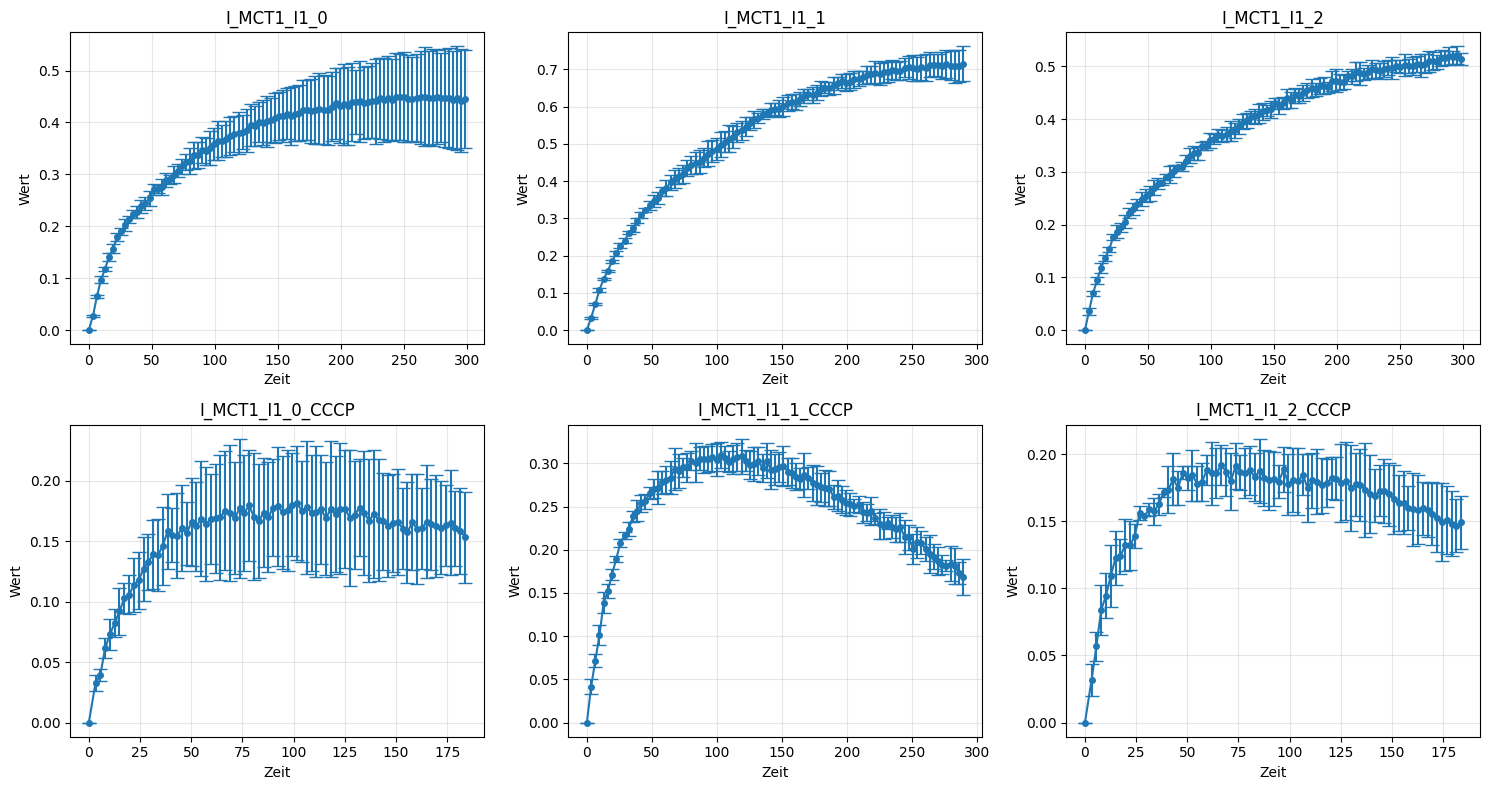

In [6]:
# Plotte Mittelwerte mit Standardabweichung für alle I_MCT1 Dataframes (mit und ohne CCCP)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

I_MCT1_dataframes = [
    ('I_MCT1_I1_0', I_MCT1_I1_0),
    ('I_MCT1_I1_1', I_MCT1_I1_1),
    ('I_MCT1_I1_2', I_MCT1_I1_2),
    ('I_MCT1_I1_0_CCCP', I_MCT1_I1_0_CCCP),
    ('I_MCT1_I1_1_CCCP', I_MCT1_I1_1_CCCP),
    ('I_MCT1_I1_2_CCCP', I_MCT1_I1_2_CCCP)
]

for idx, (name, df) in enumerate(I_MCT1_dataframes):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Extrahiere Zeit (erste Spalte) und Messwerte (andere Spalten)
    time = df["Time"]
    mean = df["Mittelwerte"]
    
    # Berechne Mittelwert und Standardabweichung
    
    std = df["Standardabweichung"]
    
    # Plotte mit Fehlerbalken
    ax.errorbar(time, mean, yerr=std, fmt='o-', capsize=5, markersize=4)
    ax.set_xlabel('Zeit')
    ax.set_ylabel('Wert')
    ax.set_title(name)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

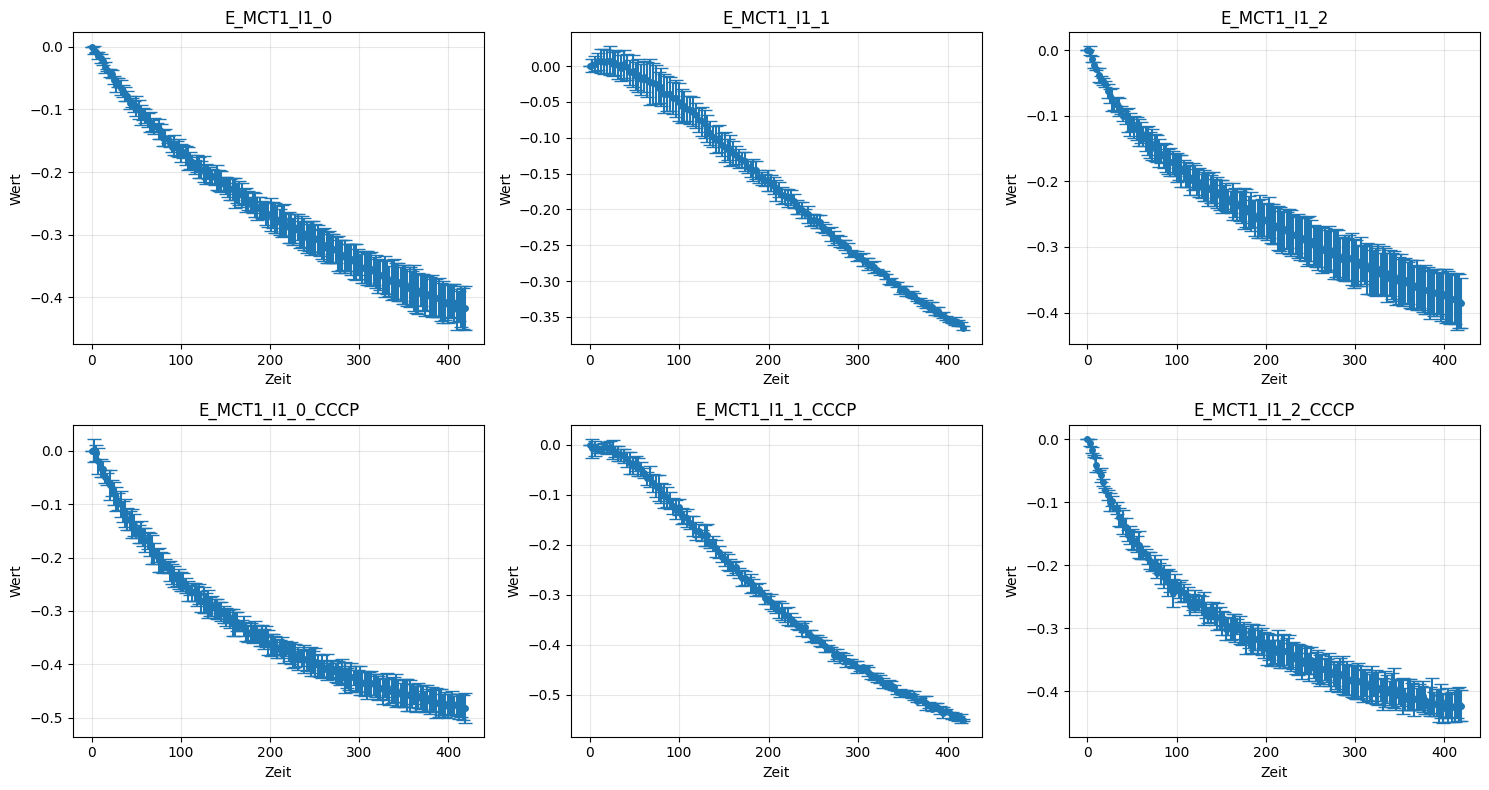

In [37]:
# Plotte Mittelwerte mit Standardabweichung für alle E_MCT1 Dataframes (Efflux, mit und ohne CCCP)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

E_MCT1_dataframes = [
    ('E_MCT1_I1_0', E_MCT1_I1_0),
    ('E_MCT1_I1_1', E_MCT1_I1_1),
    ('E_MCT1_I1_2', E_MCT1_I1_2),
    ('E_MCT1_I1_0_CCCP', E_MCT1_I1_0_CCCP),
    ('E_MCT1_I1_1_CCCP', E_MCT1_I1_1_CCCP),
    ('E_MCT1_I1_2_CCCP', E_MCT1_I1_2_CCCP)
]

for idx, (name, df) in enumerate(E_MCT1_dataframes):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Zeit, Mittelwert, Standardabweichung aus dataframe1-Ausgabe entnehmen
    time = df['Time']
    mean = df['Mittelwerte']
    std = df['Standardabweichung']

    ax.errorbar(time, mean, yerr=std, fmt='o-', capsize=5, markersize=4)
    ax.set_xlabel('Zeit')
    ax.set_ylabel('Wert')
    ax.set_title(name)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

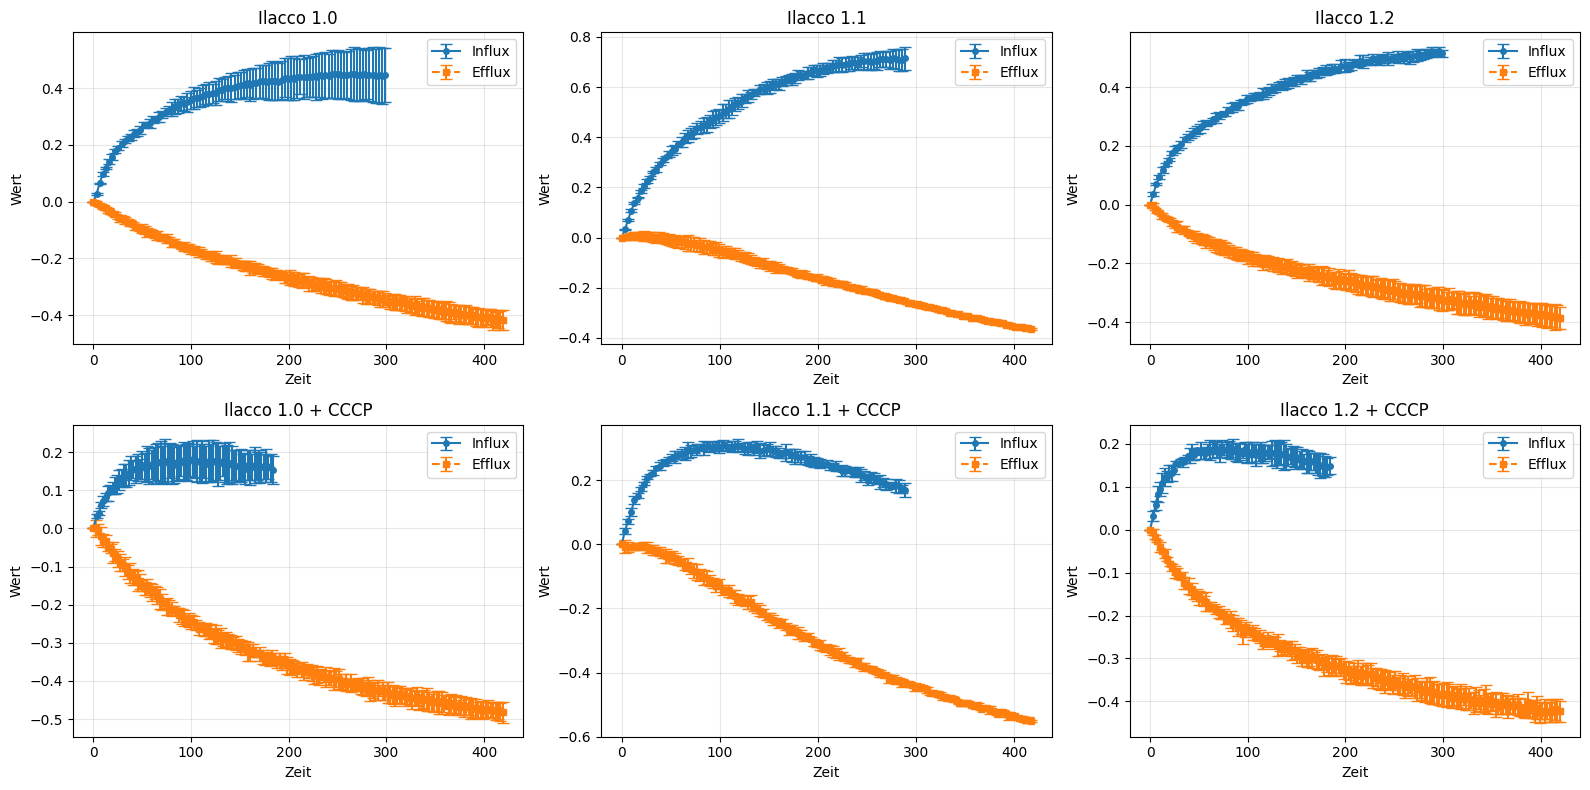

In [38]:
# Kombinierte Plots: Influx und Efflux je Bedingung (mit/ohne CCCP)
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

pairs = [
    ("Ilacco 1.0", I_MCT1_I1_0, E_MCT1_I1_0),
    ("Ilacco 1.1", I_MCT1_I1_1, E_MCT1_I1_1),
    ("Ilacco 1.2", I_MCT1_I1_2, E_MCT1_I1_2),
    ("Ilacco 1.0 + CCCP", I_MCT1_I1_0_CCCP, E_MCT1_I1_0_CCCP),
    ("Ilacco 1.1 + CCCP", I_MCT1_I1_1_CCCP, E_MCT1_I1_1_CCCP),
    ("Ilacco 1.2 + CCCP", I_MCT1_I1_2_CCCP, E_MCT1_I1_2_CCCP),
]

for idx, (title, df_in, df_eff) in enumerate(pairs):
    row, col = divmod(idx, 3)
    ax = axes[row, col]

    # Influx-Daten (Mittelwerte ± Standardabweichung)
    t_in = df_in["Time"]
    m_in = df_in["Mittelwerte"]
    s_in = df_in["Standardabweichung"]
    ax.errorbar(t_in, m_in, yerr=s_in, fmt='o-', capsize=4, markersize=4,
                color='C0', label='Influx')

    # Efflux-Daten (Mittelwerte ± Standardabweichung)
    t_e = df_eff["Time"]
    m_e = df_eff["Mittelwerte"]
    s_e = df_eff["Standardabweichung"]
    ax.errorbar(t_e, m_e, yerr=s_e, fmt='s--', capsize=4, markersize=4,
                color='C1', label='Efflux')

    ax.set_title(title)
    ax.set_xlabel('Zeit')
    ax.set_ylabel('Wert')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Lineare Fits (0–30 s) und Vergleich der |Steigungen| zwischen Influx und Efflux
# Nutzt `fit_linear` aus utils_functions

# Paare definieren (gleich wie im kombinierten Plot)
pairs = [
    ("Ilacco 1.0", I_MCT1_I1_0, E_MCT1_I1_0),
    ("Ilacco 1.1", I_MCT1_I1_1, E_MCT1_I1_1),
    ("Ilacco 1.2", I_MCT1_I1_2, E_MCT1_I1_2),
    ("Ilacco 1.0 + CCCP", I_MCT1_I1_0_CCCP, E_MCT1_I1_0_CCCP),
    ("Ilacco 1.1 + CCCP", I_MCT1_I1_1_CCCP, E_MCT1_I1_1_CCCP),
    ("Ilacco 1.2 + CCCP", I_MCT1_I1_2_CCCP, E_MCT1_I1_2_CCCP),
]

# Fit-Inputs erstellen
influx_frames = [(f"{name} (Influx)", 'o', df_in) for name, df_in, _ in pairs]
efflux_frames = [(f"{name} (Efflux)", 's', df_eff) for name, _, df_eff in pairs]

# Lineare Fits auf 0–30 s begrenzen
results_in = fit_linear(influx_frames, time_limit=30)
results_e  = fit_linear(efflux_frames, time_limit=30)

# Vergleich der |Steigungen|
conditions = []
m_in_abs, m_in_err = [], []
m_e_abs,  m_e_err  = [], []

for name, _, _ in pairs:
    rin = results_in.get(f"{name} (Influx)")
    ree = results_e.get(f"{name} (Efflux)")
    if (rin is None) or (ree is None):
        continue
    conditions.append(name)
    m_in_abs.append(abs(rin['m']))
    m_in_err.append(rin['m_err'])
    m_e_abs.append(abs(ree['m']))
    m_e_err.append(ree['m_err'])

# Als Tabelle anzeigen
import pandas as pd
summary_df = pd.DataFrame({
    'Bedingung': conditions,
    '|m| Influx [1/s]': m_in_abs,
    'm_err Influx': m_in_err,
    '|m| Efflux [1/s]': m_e_abs,
    'm_err Efflux': m_e_err,
    'Delta |m| (Influx - Efflux)': [i - e for i, e in zip(m_in_abs, m_e_abs)]
})
display(summary_df)

# Balkendiagramm (Seiten-an-Seite)
import numpy as np
x = np.arange(len(conditions))
width = 0.38
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(x - width/2, m_in_abs, width, yerr=m_in_err, label='Influx |m|', capsize=4, color='C0', alpha=0.85)
ax.bar(x + width/2, m_e_abs,  width, yerr=m_e_err,  label='Efflux |m|', capsize=4, color='C1', alpha=0.85)
ax.set_xticks(x)
ax.set_xticklabels(conditions, rotation=25, ha='right')
ax.set_ylabel('Betrag der Steigung |m| [1/s] (0–30 s)')
ax.set_title('Vergleich der Beträge der Steigung: Influx vs. Efflux (0–30 s)')
ax.grid(axis='y', alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()